In [1]:
from Coding.Encoders import TTFSCoding, NeumericalCoding, PoissonCoding
from Util.Pooling import MeanPooling
from matplotlib import pyplot as plt
import torch
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

/Users/mohazamani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### TTFS


In [2]:
class BaseCodingChecker:
    def load_image(self, dir: str):
        self.org_im = plt.imread(dir)
        self.com_im = MeanPooling(size=(8, 8))(self.org_im)

In [3]:
class TTFS(BaseCodingChecker):

    def encode(self, time: int = 250):
        ttfs = TTFSCoding(time=time)
        self.org_im_code = ttfs(data=torch.Tensor(self.org_im.flatten()) / 256)
        self.com_im_code = ttfs(data=torch.Tensor(self.com_im.flatten()) / 256)

    def prepare_data_for_plot(self):
        pass

    def raster_plot(self):
        plt.rcParams.update({'font.size': 6})
        _, ax = plt.subplots(figsize=(6, 6))
        gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[
                      1, 1], wspace=0.3, hspace=0.3)

        ax1 = plt.subplot(gs[0])
        ax1.imshow(self.org_im)
        ax1.axis('off')

        ax2 = plt.subplot(gs[1])
        ax2.scatter(list(self.org_im_data.values()), list(self.org_im_data.keys()), s=4, c='black', label='ex',
                    alpha=0.3, edgecolors='none', marker='.')

        ax3 = plt.subplot(gs[2])
        ax3.imshow(self.com_im)
        ax3.axis('off')

        ax4 = plt.subplot(gs[3])
        ax4.scatter(list(self.com_im_data.values()), list(self.com_im_data.keys()), s=25, c='black', label='ex',
                    alpha=0.3, edgecolors='none', marker='.')

        for ax in [ax2, ax4]:
            ax.set_xlabel('Time', fontsize=8)
            ax.set_ylabel('Neuron Id', fontsize=8)
            ax.set_title('Scatter Plot', pad=10, fontsize=8)
        ax1.set_title('Original Image', pad=10, fontsize=8)
        ax3.set_title('Compressed Image', pad=10, fontsize=8)

        plt.show()

In [4]:
ttfs = TTFS()
ttfs.load_image('./data/bird.tif')
ttfs.encode()
ttfs.prepare_data_for_plot()
ttfs.raster_plot()

AttributeError: 'TTFS' object has no attribute 'prepare_data_for_plot'

/var/folders/hf/43w7b51j725973smp2rmsbkc0000gp/T/ipykernel_4773/3783374186.py:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


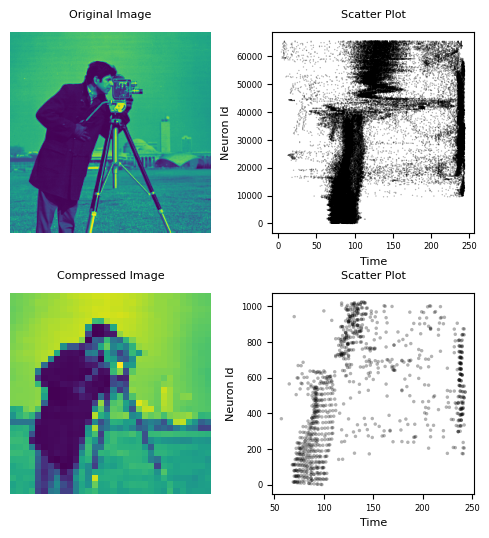

In [ ]:
ttfs.load_image('./data/camera.tif')
ttfs.encode()
ttfs.prepare_data_for_plot()
ttfs.raster_plot()

/var/folders/hf/43w7b51j725973smp2rmsbkc0000gp/T/ipykernel_99927/3783374186.py:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


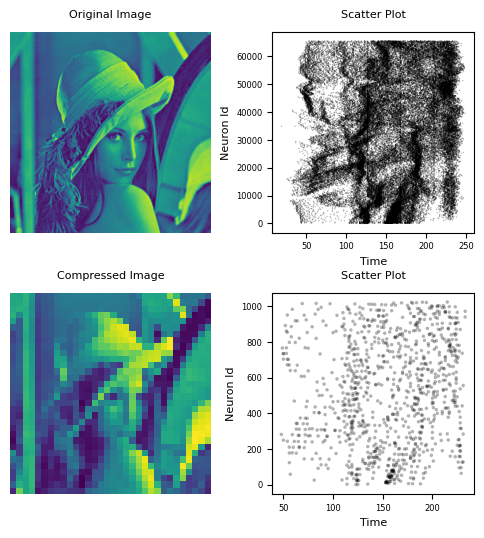

In [ ]:
ttfs.load_image('./data/lena1.tif')
ttfs.encode()
ttfs.prepare_data_for_plot()
ttfs.raster_plot()

/var/folders/hf/43w7b51j725973smp2rmsbkc0000gp/T/ipykernel_99927/3783374186.py:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


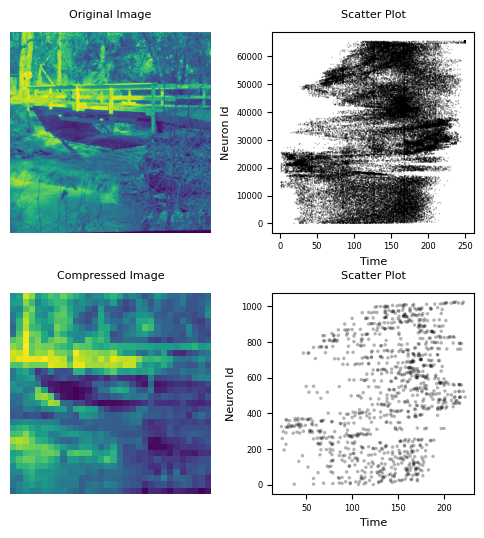

In [ ]:
ttfs.load_image('./data/bridge.tif')
ttfs.encode()
ttfs.prepare_data_for_plot()
ttfs.raster_plot()

### Nemerical Coding


In [ ]:
class NCoding(BaseCodingChecker):

    def encode(self, time: int = 250):
        nc = NeumericalCoding(time=time)
        self.org_im_code = nc(data=torch.Tensor(self.org_im.flatten()) / 256)
        self.com_im_code = nc(data=torch.Tensor(self.com_im.flatten()) / 256)

    def prepare_data_for_plot(self):
        self.org_im_data = torch.nonzero(self.org_im_code == 1)
        self.com_im_data = torch.nonzero(self.com_im_code == 1)

    def raster_plot(self):
        plt.rcParams.update({'font.size': 6})
        _, ax = plt.subplots(figsize=(6, 6))
        gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[
                      1, 1], wspace=0.3, hspace=0.3)

        ax1 = plt.subplot(gs[0])
        ax1.imshow(self.org_im)
        ax1.axis('off')

        ax2 = plt.subplot(gs[1])
        ax2.scatter(self.org_im_data[:, 1], self.org_im_data[:, 0], s=1, c='black', label='ex',
                    alpha=0.3, edgecolors='none', marker='.')

        ax3 = plt.subplot(gs[2])
        ax3.imshow(self.com_im)
        ax3.axis('off')

        ax4 = plt.subplot(gs[3])
        ax4.scatter(self.com_im_data[:, 1], self.com_im_data[:, 0], s=6, c='black', label='ex',
                    alpha=0.3, edgecolors='none', marker='.')

        for ax in [ax2, ax4]:
            ax.set_xlabel('Time', fontsize=8)
            ax.set_ylabel('Neuron Id', fontsize=8)
            ax.set_title('Scatter Plot', pad=10, fontsize=8)
        ax1.set_title('Original Image', pad=10, fontsize=8)
        ax3.set_title('Compressed Image', pad=10, fontsize=8)

        plt.show()

/var/folders/hf/43w7b51j725973smp2rmsbkc0000gp/T/ipykernel_88512/118002672.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


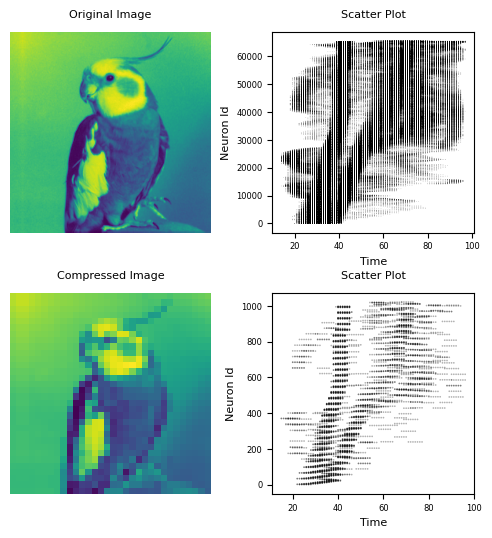

In [ ]:
nc = NCoding()
nc.load_image('./data/bird.tif')
nc.encode(time=100)
nc.prepare_data_for_plot()
nc.raster_plot()

/var/folders/hf/43w7b51j725973smp2rmsbkc0000gp/T/ipykernel_39535/118002672.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


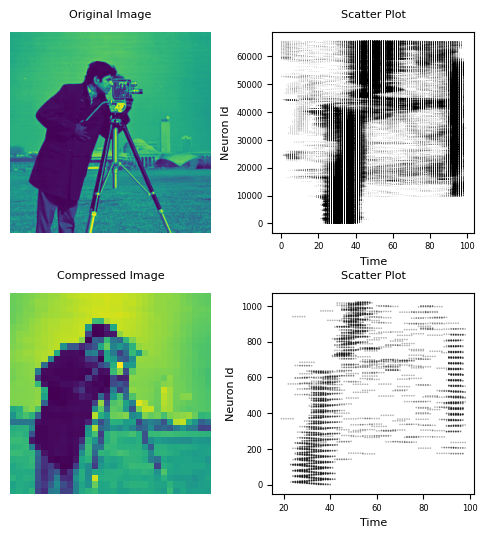

In [ ]:
nc.load_image('./data/camera.tif')
nc.encode(time=100)
nc.prepare_data_for_plot()
nc.raster_plot()

/var/folders/hf/43w7b51j725973smp2rmsbkc0000gp/T/ipykernel_39535/118002672.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


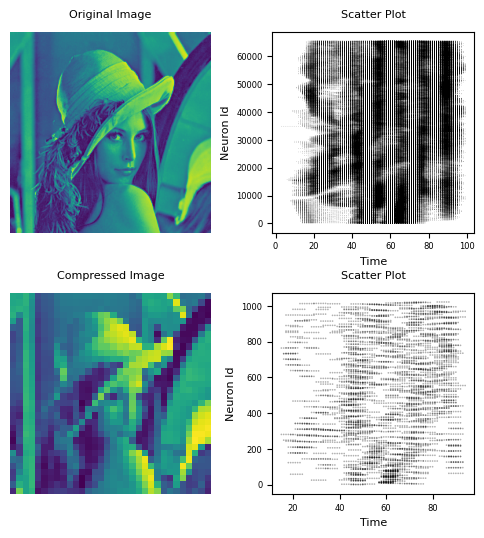

In [ ]:
nc.load_image('./data/lena1.tif')
nc.encode(time=100)
nc.prepare_data_for_plot()
nc.raster_plot()

/var/folders/hf/43w7b51j725973smp2rmsbkc0000gp/T/ipykernel_39535/118002672.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


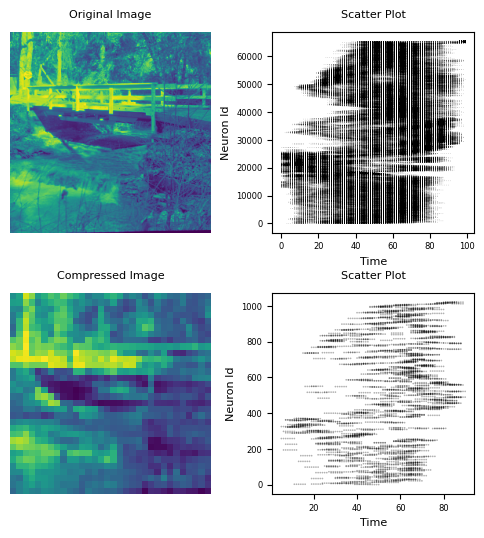

In [ ]:
nc.load_image('./data/bridge.tif')
nc.encode(time=100)
nc.prepare_data_for_plot()
nc.raster_plot()

### PIOSSON Coding


In [ ]:
class PCoding(BaseCodingChecker):

    def encode(self, time: int = 250, lambda_param=0.09):
        pc = PoissonCoding(time_window=time, ratio=lambda_param)
        self.org_im_code = pc(torch.Tensor(self.org_im.flatten()) / 256)
        self.com_im_code = pc(torch.Tensor(self.com_im.flatten()) / 256)

    def prepare_data_for_plot(self):
        self.org_im_data = torch.nonzero(self.org_im_code == True)
        self.com_im_data = torch.nonzero(self.com_im_code == True)

    def raster_plot(self):
        plt.rcParams.update({'font.size': 6})
        _, ax = plt.subplots(figsize=(6, 6))
        gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[
                      1, 1], wspace=0.3, hspace=0.3)

        ax1 = plt.subplot(gs[0])
        ax1.imshow(self.org_im)
        ax1.axis('off')

        ax2 = plt.subplot(gs[1])
        ax2.scatter(self.org_im_data[:, 1], self.org_im_data[:, 0], s=1, c='black', label='ex',
                    alpha=0.3, edgecolors='none', marker='.')

        ax3 = plt.subplot(gs[2])
        ax3.imshow(self.com_im)
        ax3.axis('off')

        ax4 = plt.subplot(gs[3])
        ax4.scatter(self.com_im_data[:, 1], self.com_im_data[:, 0], s=5, c='black', label='ex',
                    alpha=0.3, edgecolors='none', marker='.')

        for ax in [ax2, ax4]:
            ax.set_xlabel('Time', fontsize=8)
            ax.set_ylabel('Neuron Id', fontsize=8)
            ax.set_title('Scatter Plot', pad=10, fontsize=8)
        ax1.set_title('Original Image', pad=10, fontsize=8)
        ax3.set_title('Compressed Image', pad=10, fontsize=8)

        plt.show()

/var/folders/hf/43w7b51j725973smp2rmsbkc0000gp/T/ipykernel_32529/83455868.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


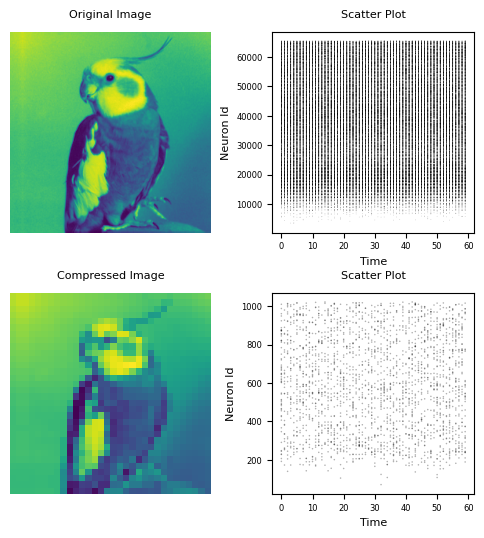

In [ ]:
pc = PCoding()

pc.load_image('./data/bird.tif')
pc.encode(time=60)
pc.prepare_data_for_plot()
pc.raster_plot()

/var/folders/hf/43w7b51j725973smp2rmsbkc0000gp/T/ipykernel_44870/2797949729.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


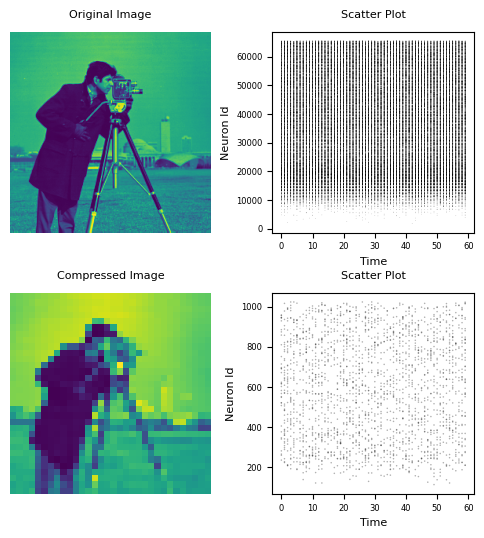

In [ ]:
pc.load_image('./data/camera.tif')
pc.encode(time=60)
pc.prepare_data_for_plot()
pc.raster_plot()

/var/folders/hf/43w7b51j725973smp2rmsbkc0000gp/T/ipykernel_6160/2797949729.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


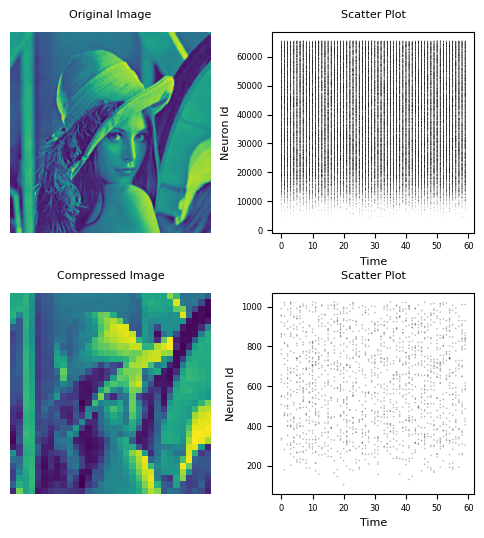

In [ ]:
pc.load_image('./data/lena1.tif')
pc.encode(time=60)
pc.prepare_data_for_plot()
pc.raster_plot()

/var/folders/hf/43w7b51j725973smp2rmsbkc0000gp/T/ipykernel_6160/2797949729.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


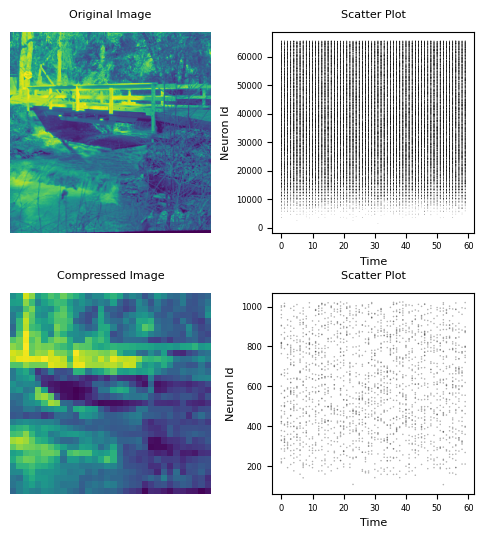

In [ ]:
pc.load_image('./data/bridge.tif')
pc.encode(time=60)
pc.prepare_data_for_plot()
pc.raster_plot()

/var/folders/hf/43w7b51j725973smp2rmsbkc0000gp/T/ipykernel_32529/83455868.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


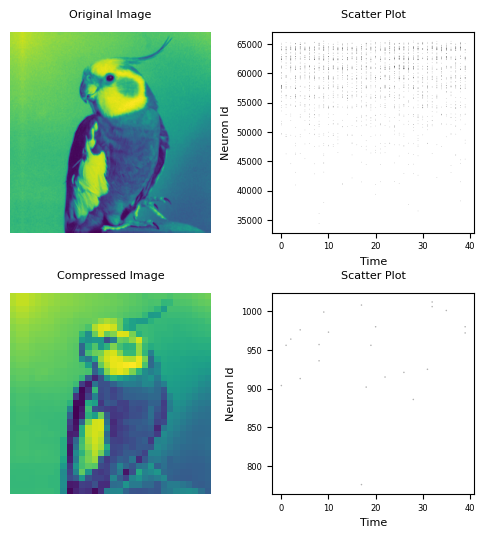

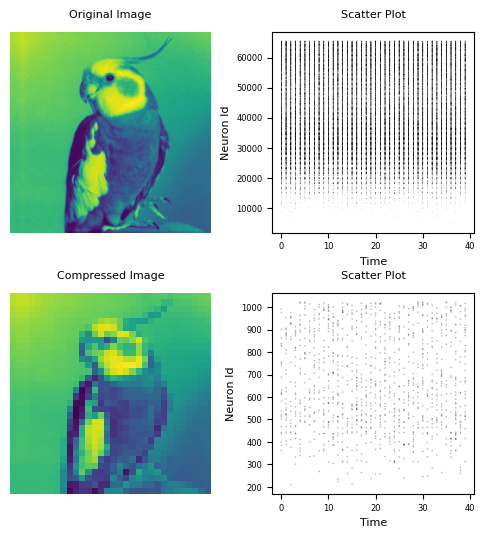

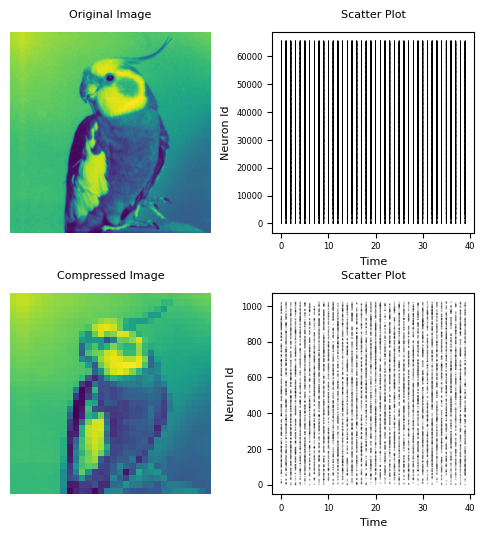

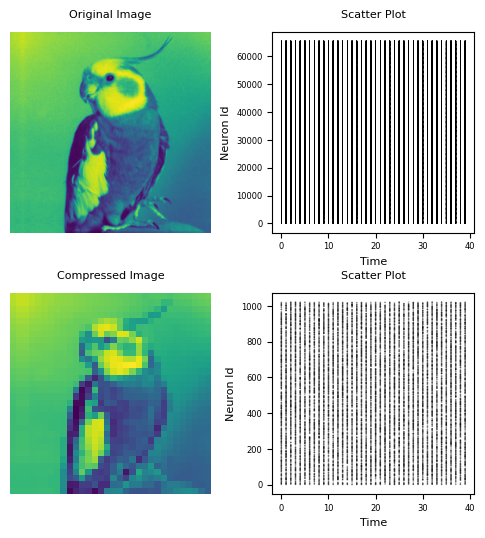

In [ ]:
for lambda_param in [0.03, 0.08, 0.5, 1]:
    pc.load_image('./data/bird.tif')
    pc.encode(time=40, lambda_param=lambda_param)
    pc.prepare_data_for_plot()
    pc.raster_plot()